# **Section A: Setup & Load Dataset**

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

sns.set_theme(style="whitegrid")

df = pd.read_csv('healthcare_dataset.csv')

# **Section B: Treat Dataset as Sample Space**

In [5]:

N = len(df)
print(f'Total observations (N): {N}')
print('-' * 30)

Total observations (N): 55500
------------------------------


# **Section C: Task 1 – Defining Events**

In [6]:
mask_A = df['Age'] > 60
mask_B = df['Medical Condition'] == 'Cancer'
mask_C = df['Billing Amount'] > 40000

#The Masks
A = df[mask_A]
B = df[mask_B]
C = df[mask_C]

print(f'Event A (Age > 60) count:       {len(A)}')
print(f'Event B (Cancer) count:         {len(B)}')
print(f'Event C (Bill > 40k) count:     {len(C)}')
print('-' * 30)

Event A (Age > 60) count:       20370
Event B (Cancer) count:         9227
Event C (Bill > 40k) count:     11430
------------------------------


# **Section D: Task 2 – Calculating Basic Probability**

In [7]:
P_A = mask_A.mean()
P_B = mask_B.mean()
P_C = mask_C.mean()

print(f'P(A) = {P_A:.4f}')
print(f'P(B) = {P_B:.4f}')
print(f'P(C) = {P_C:.4f}')
print('-' * 30)

P(A) = 0.3670
P(B) = 0.1663
P(C) = 0.2059
------------------------------


# **Section E: Task 3 – Combined Events**

In [8]:
mask_int = mask_A & mask_B
P_A_int_B = mask_int.mean()
print(f'P(A ∩ B) [Intersection] = {P_A_int_B:.4f}')

#Union(OR)
mask_union = mask_A | mask_B
P_A_union_B = mask_union.mean()
print(f'P(A ∪ B) [Union]        = {P_A_union_B:.4f}')

#Complement(NOT)
mask_A_comp = ~mask_A
P_A_comp = mask_A_comp.mean()
print(f'P(Aᶜ)    [Complement]   = {P_A_comp:.4f}')

#Verification
rule_value = P_A + P_B - P_A_int_B
print('-' * 30)
print(f'Rule Verification (P(A)+P(B)-P(A∩B)): {rule_value:.4f}')
print(f'Actual P(A ∪ B) from data:            {P_A_union_B:.4f}')
print(f'Match: {np.isclose(rule_value, P_A_union_B)}')

P(A ∩ B) [Intersection] = 0.0610
P(A ∪ B) [Union]        = 0.4722
P(Aᶜ)    [Complement]   = 0.6330
------------------------------
Rule Verification (P(A)+P(B)-P(A∩B)): 0.4722
Actual P(A ∪ B) from data:            0.4722
Match: True


# **Section F: Visualization**

/tmp/ipython-input-3782598469.py:5: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


/tmp/ipython-input-3782598469.py:9: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




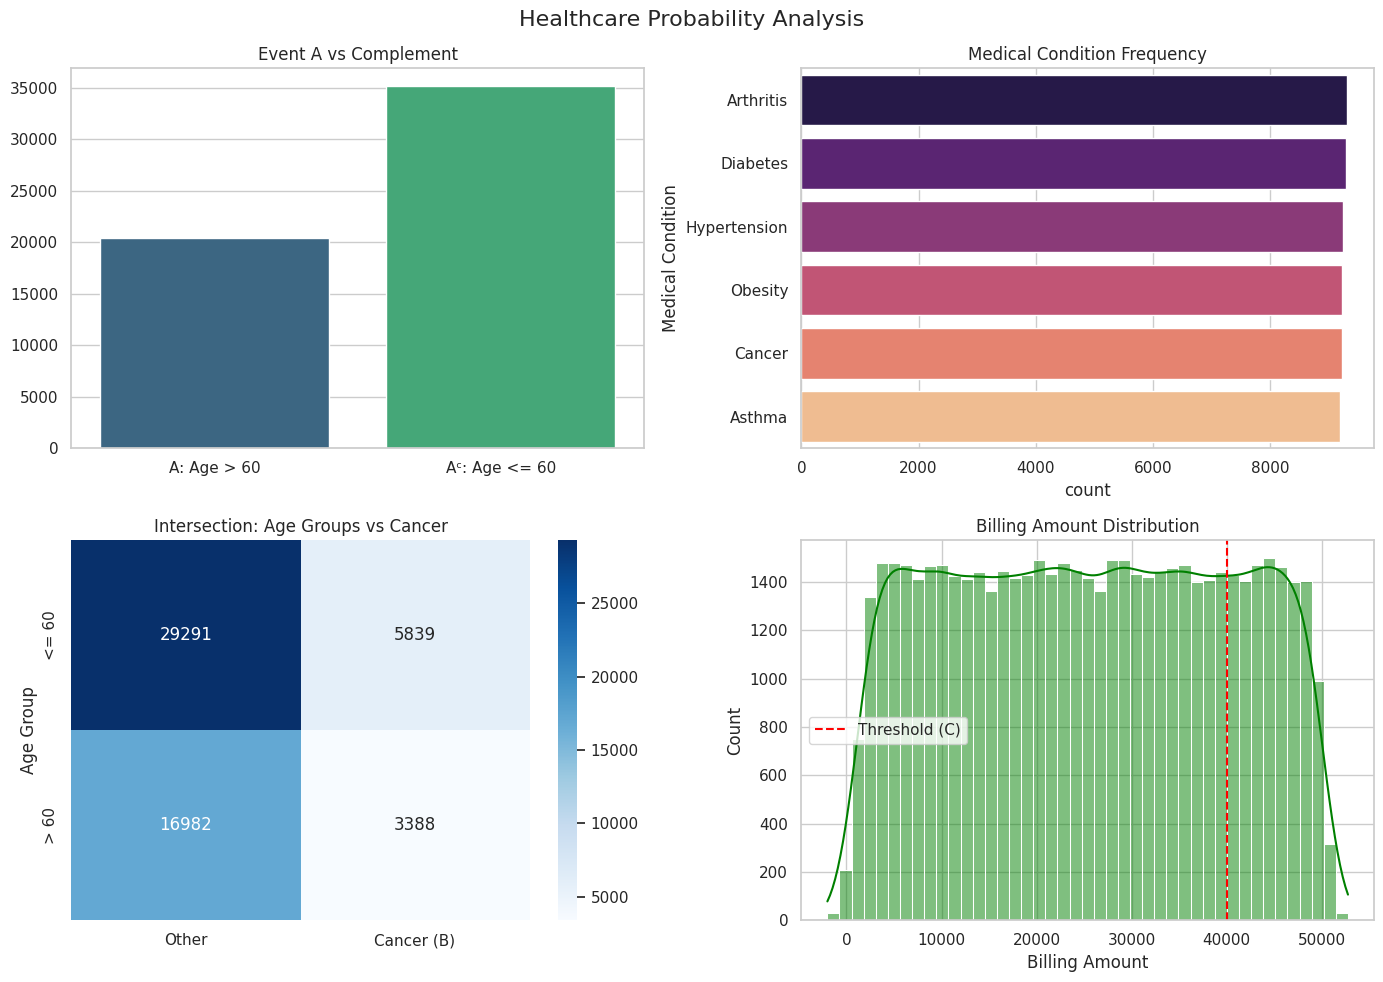

In [9]:
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
fig.suptitle('Healthcare Probability Analysis', fontsize=16)

#Versus Complement
sns.barplot(x=['A: Age > 60', 'Aᶜ: Age <= 60'], y=[len(A), len(df)-len(A)], ax=axes[0,0], palette='viridis')
axes[0,0].set_title('Event A vs Complement')

#Frequency table
sns.countplot(y=df['Medical Condition'], ax=axes[0,1], palette='magma', order=df['Medical Condition'].value_counts().index)
axes[0,1].set_title('Medical Condition Frequency')

#Heatmap
df['Age Group'] = np.where(mask_A, '> 60', '<= 60')
ct = pd.crosstab(df['Age Group'], df['Medical Condition'] == 'Cancer')
ct.columns = ['Other', 'Cancer (B)']
sns.heatmap(ct, annot=True, fmt='d', cmap='Blues', ax=axes[1,0])
axes[1,0].set_title('Intersection: Age Groups vs Cancer')

#Biling DIstribution
sns.histplot(df['Billing Amount'], kde=True, ax=axes[1,1], color='green')
axes[1,1].axvline(40000, color='red', linestyle='--', label='Threshold (C)')
axes[1,1].set_title('Billing Amount Distribution')
axes[1,1].legend()

plt.tight_layout()
plt.show()

# **Section G: Summary**

In this milestone, fundamental probability concepts were explored using a real-world healthcare dataset, with the entire dataset treated as the sample space. Meaningful events based on patient age, admission type, and billing amounts allowed probability calculations to reflect actual clinical scenarios. By examining individual probabilities, complements, intersections, and unions, key principles like the complement and addition rules were reinforced and validated. Comparisons with theoretical expectations confirmed the reliability of probability laws, while visualizations helped interpret event distributions and frequencies. Overall, the milestone demonstrates how abstract probability concepts can be effectively applied and understood through real, structured healthcare data.